In [80]:
# importing libraries
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [81]:
# importing data
data=pd.read_csv("housing_in_london_monthly_variables (2).csv")
data['date']=pd.to_datetime(data['date'])
data

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 741.1+ KB


# Data Preparation

In [83]:
# Data Feature Engineering
# dropping  the code, area and date column

data=data.drop(['code','area'],axis=1)
data

,date,average_price,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,91449,17.0,NaN,1
1,1995-02-01,82203,7.0,NaN,1
2,1995-03-01,79121,14.0,NaN,1
3,1995-04-01,77101,7.0,NaN,1
4,1995-05-01,84409,10.0,NaN,1
...,...,...,...,...,...
13544,2019-09-01,249942,64605.0,NaN,0
13545,2019-10-01,249376,68677.0,NaN,0
13546,2019-11-01,248515,67814.0,NaN,0
13547,2019-12-01,250410,NaN,NaN,0


In [84]:
# Removing the NAN from the data
data=data.fillna(0)
data

,date,average_price,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,91449,17.0,0.0,1
1,1995-02-01,82203,7.0,0.0,1
2,1995-03-01,79121,14.0,0.0,1
3,1995-04-01,77101,7.0,0.0,1
4,1995-05-01,84409,10.0,0.0,1
...,...,...,...,...,...
13544,2019-09-01,249942,64605.0,0.0,0
13545,2019-10-01,249376,68677.0,0.0,0
13546,2019-11-01,248515,67814.0,0.0,0
13547,2019-12-01,250410,0.0,0.0,0


In [85]:
#data summary
data.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13549.000000,13549.000000,13549.000000
mean,2.635197e+05,3866.978449,1185.030703,0.733338
std,1.876175e+05,12076.629035,1265.015897,0.442230
min,4.072200e+04,0.000000,0.000000,0.000000
25%,1.323800e+05,244.000000,0.000000,0.000000
50%,2.229190e+05,369.000000,1085.000000,1.000000
75%,3.368430e+05,3073.000000,2210.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


In [86]:
# summary for the categorical variables
data['borough_flag'].value_counts()

1    9936
0    3613
Name: borough_flag, dtype: int64

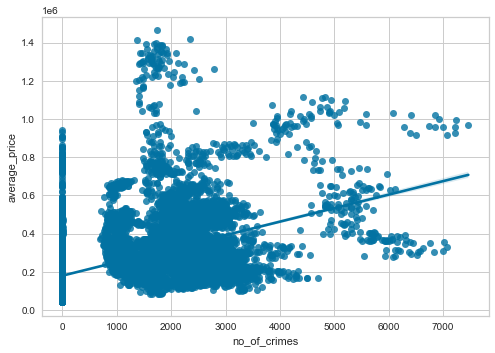

In [87]:
# ploting  the distributions
### A Scatterplot for the  house price against crime rate
sns.regplot(x="no_of_crimes", y="average_price", data=data);


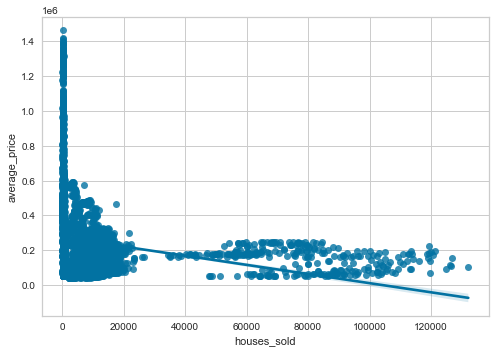

In [88]:



## a scatterplot for the  house price against  the Number of house sold

sns.regplot(x="houses_sold", y="average_price", data=data);


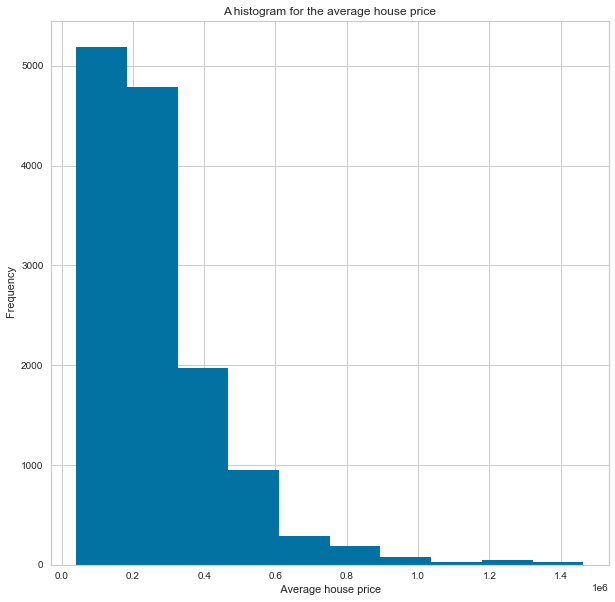

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

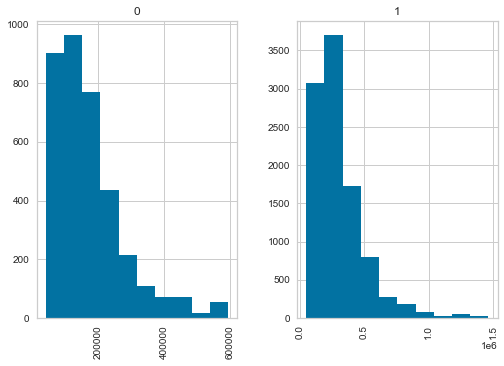

In [89]:
# Histogram of the average house price
fig,ax=plt.subplots(figsize=(10,10))
ax.hist(data['average_price'])
plt.title("A histogram for the average house price")
plt.xlabel(" Average house price")
plt.ylabel(" Frequency")
plt.show()

# Histogram of the average_pricee by borough_flag
data['average_price'].hist(by=data['borough_flag'])

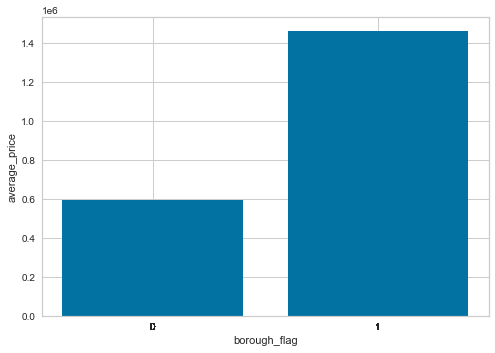

In [90]:
# the average house price distribution by borough_flag
plt.bar(data['borough_flag'],data['average_price'])
# create names on the x-axis
plt.xticks(data['borough_flag'])
plt.xlabel("borough_flag")
plt.ylabel("average_price")

# Show graphic
plt.show()

<AxesSubplot:title={'center':'The Distribtion of borough_flag'}>

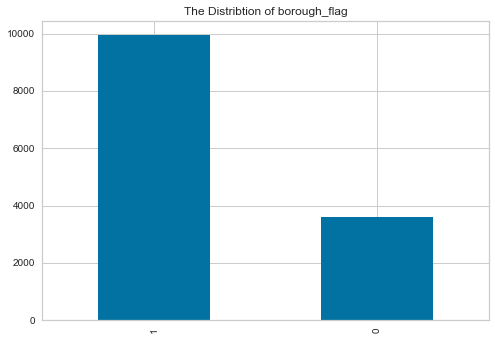

In [91]:
data['borough_flag'].value_counts().plot(kind='bar',title="The Distribtion of borough_flag")

# Modelling

#########################################################################

FITTING USING LINEAR REGRESSION

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [93]:
# splitting response variable from the explanatory variables
X=data[['houses_sold','no_of_crimes','borough_flag']]
y=data['average_price']
X = pd.get_dummies(data=X, drop_first=True)
# splitting data into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)

In [94]:
# training the  Linear model
regr = linear_model.LinearRegression() 
regr.fit(X_train, Y_train)

#  Intercept coefficients
print(regr.intercept_)

177637.93119210802


In [95]:
coeff_df = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
houses_sold,-0.524926
no_of_crimes,69.468849
borough_flag,7445.314838


In [96]:
# making prediction

y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
13407,189115,145901.454304
2579,250917,362292.683982
11641,140060,174941.913307
2192,144641,381524.542764
12226,188039,174995.455719


In [97]:
# model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 114196.44669308604
Mean Squared Error: 27604782668.167526
Root Mean Squared Error: 166146.87077452746


In [98]:
#!pip install yellowbrick

F:\Users\Jiji AV\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


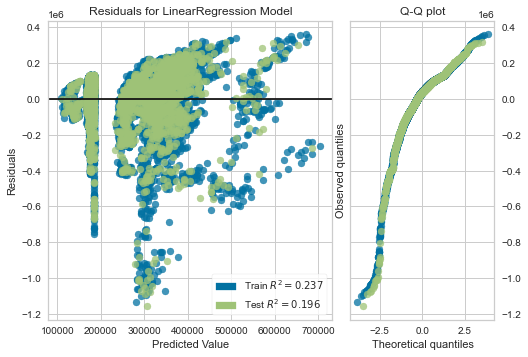

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [99]:
# residual plot
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr, hist=False, qqplot=True)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.show()  

##################################################

In [100]:
# splitting response variable from the explanatory variables
X=data[['houses_sold','no_of_crimes']]
y=data['average_price']
X = pd.get_dummies(data=X, drop_first=True)


In [101]:
#!pip install scikit-plot

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt

In [103]:
# splitting data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)

In [104]:
regr = linear_model.LinearRegression() 
regr.fit(X_train, Y_train)
reg_pred = regr.predict(X_test)

In [105]:
DT= DecisionTreeRegressor(max_depth=2,criterion='squared_error')
DT.fit(X_train,Y_train)
dt_pred = DT.predict(X_test)

In [106]:
RF = RandomForestRegressor(n_estimators=100,criterion='squared_error')
RF.fit(X_train,Y_train)
RF_pred=RF.predict(X_test)


For linear_model ,

       Actual      Predicted
13407  189115  144389.687969
2579   250917  362336.805807
11641  140060  178859.492480
2192   144641  381865.776412
12226  188039  178923.045072 

Mean Absolute Error: 114110.47596901383
Mean Squared Error: 27613794477.228622
Root Mean Squared Error: 166173.9885698981
Explained Variance Score is 0.19574679342689816


F:\Users\Jiji AV\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


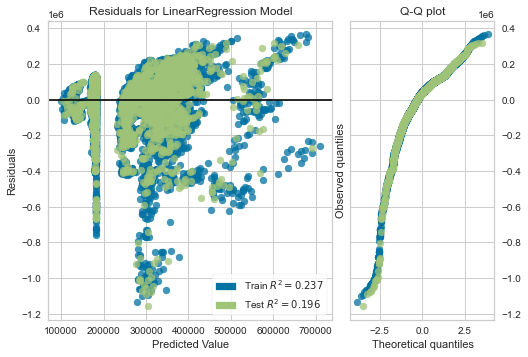


For DecisionTree_Regressor ,

       Actual      Predicted
13407  189115  146904.187883
2579   250917  409600.442189
11641  140060  146904.187883
2192   144641  293540.300912
12226  188039  146904.187883 

Mean Absolute Error: 101679.81962143251
Mean Squared Error: 22540803908.762657
Root Mean Squared Error: 150135.9514199136
Explained Variance Score is 0.3436960972467732


F:\Users\Jiji AV\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


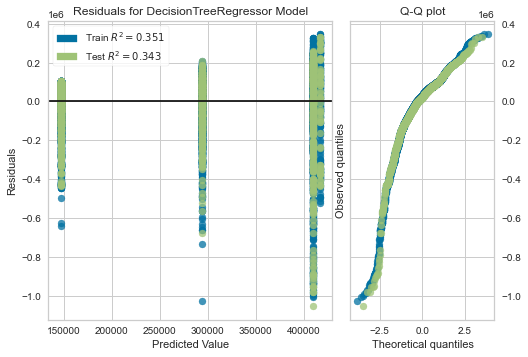


For RandomForest_Regressor ,

       Actual      Predicted
13407  189115  220313.990000
2579   250917  356989.930000
11641  140060  146630.869857
2192   144641  207445.410000
12226  188039  289242.324667 

Mean Absolute Error: 99603.60634656412
Mean Squared Error: 22585132344.300632
Root Mean Squared Error: 150283.50656110147
Explained Variance Score is 0.3422441429939127


F:\Users\Jiji AV\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


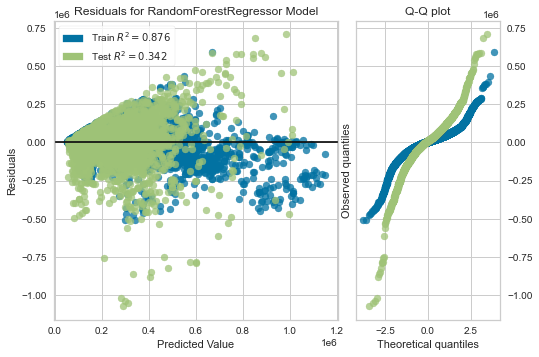

In [107]:
y_pred_list=[reg_pred,dt_pred,RF_pred]
method=['linear_model','DecisionTree_Regressor','RandomForest_Regressor']
model=[regr,DT,RF]

for i, y_pred in enumerate(y_pred_list):
    print('\nFor',method[i],',\n')
    df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
    print(df.head(),'\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
    print('Explained Variance Score is {}'.format(evs(Y_test, y_pred)))
    visualizer = ResidualsPlot(model[i], hist=False, qqplot=True)
    visualizer.fit(X_train, Y_train)
    visualizer.score(X_test, Y_test)
    visualizer.show() 

In [108]:
#Residuals for Decision Tree is not random. Thus we cannot say that it is a model that fits the data.